In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit

messages=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Bigram_Combine NEW sent pol.csv',header=None,names=["sentiment","text","polarity","repetations"])
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer


In [2]:
#descriptions
print(messages.describe())

           polarity   repetations
count  54937.000000  54937.000000
mean       0.012156      1.540619
std        0.151065      5.874779
min       -1.000000      1.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      1.000000
max        1.000000    464.000000


In [3]:
# class distribution
print(messages.groupby('sentiment').size())

sentiment
negative     2939
neutral     47051
positive     4947
dtype: int64


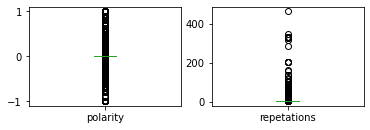

In [4]:
from matplotlib import pyplot
messages.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [5]:
messages['text']

0                covid cases
1                  new cases
2        valentinesday covid
3               red nviolets
4              nviolets blue
                ...         
54932            caseload th
54933               day wait
54934             wait watch
54935             watch says
54936           covid odisha
Name: text, Length: 54937, dtype: object

In [6]:
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer
import re
corpus = []
lemmatizer = WordNetLemmatizer()
 
for i in range(0,len(messages['text'])):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    non_word=['n','rt','xe','xa','xc','co','xf','xxd','xs','x','nx','ni','nfor','nhow','eh','de''amo','nis','wa']
    review=[e for e in review if e not in non_word]
    corpus.append(review)

In [7]:
len(corpus)

54937

In [8]:
X=[]
for i in range (len(corpus)):
    c=''.join([str(elem+" ") for elem in corpus[i]])
    X.append(c)


In [9]:
len(X)

54937

In [10]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [11]:
w=messages["sentiment"]
w.shape

(54937,)

In [12]:
Y.shape

(54937, 1000)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(Y, w, test_size=0.20, random_state=1)

In [14]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [15]:
 #Spot Check Algorithms
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import numpy
import time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("\tscore",score1)


LR: 0.951626 (0.002560) time taken (10.775528)
	score (0.9498543866035676, 0.9498543866035676, 0.9498543866035676, None)
LDA: 0.952581 (0.002805) time taken (185.075434)
	score (0.9504914452129596, 0.9504914452129596, 0.9504914452129596, None)
KNN: 0.921796 (0.001883) time taken (3211.814616)
	score (0.9196396068438296, 0.9196396068438296, 0.9196396068438296, None)
CART: 0.951785 (0.003206) time taken (2732.417743)
	score (0.9500364033491081, 0.9500364033491081, 0.9500364033491081, None)
NB: 0.183508 (0.002869) time taken (14.790845)
	score (0.186112122315253, 0.186112122315253, 0.186112122315253, None)
SVM: 0.856857 (0.000116) time taken (10726.735775)
	score (0.8548416454313796, 0.8548416454313796, 0.8548416454313796, None)


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [17]:
 #Spot Check Algorithms
models = []

models.append(('MultiNB', MultinomialNB()))
models.append(('BerNB', BernoulliNB()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearSVC', LinearSVC(max_iter=5000)))
models.append(('Adab', AdaBoostClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PassiveAC', PassiveAggressiveClassifier()))
models.append(('Perceptron',  Perceptron()))
models.append(('RFT', RandomForestClassifier()))
models.append(('MLP', MLPClassifier(max_iter=1000)))
# evaluate each model in turn
results = []
names = []
accuracy=[]
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("\tscore",score1)
   

MultiNB: 0.951580 (0.002555) time taken (20.262719)
	score (0.9497633782307973, 0.9497633782307973, 0.9497633782307973, None)
BerNB: 0.951717 (0.002494) time taken (23.076458)
	score (0.9501274117218784, 0.9501274117218784, 0.9501274117218784, None)
LR: 0.951626 (0.002560) time taken (9.513896)
	score (0.9498543866035676, 0.9498543866035676, 0.9498543866035676, None)
LinearSVC: 0.952445 (0.002711) time taken (14.682920)
	score (0.9505824535857299, 0.9505824535857299, 0.9505824535857299, None)
Adab: 0.924936 (0.002153) time taken (663.248485)
	score (0.9235529668729523, 0.9235529668729523, 0.9235529668729523, None)
Ridge: 0.952195 (0.002597) time taken (25.015377)
	score (0.9504914452129596, 0.9504914452129596, 0.9504914452129596, None)
PassiveAC: 0.951353 (0.002924) time taken (41.601242)
	score (0.9494903531124863, 0.9494903531124863, 0.9494903531124863, None)
Perceptron: 0.950352 (0.002987) time taken (25.106815)
	score (0.7085001820167456, 0.7085001820167456, 0.7085001820167456, Non

In [18]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,1].values
q[0:14]

0      neutral
1     positive
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10     neutral
11     neutral
12     neutral
13     neutral
14     neutral
15    positive
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

Accuracy of the LinearSVC model is for neutral class 0.9508554787040407
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.838


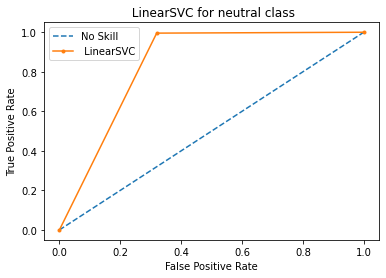

In [19]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC(max_iter=5000)
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LinearSVC model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [20]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,2].values
q[0:14]

0      neutral
1     positive
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10     neutral
11     neutral
12     neutral
13     neutral
14     neutral
15    positive
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

Accuracy of the LinearSVC model is for positive class 0.9734255551510739
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.865


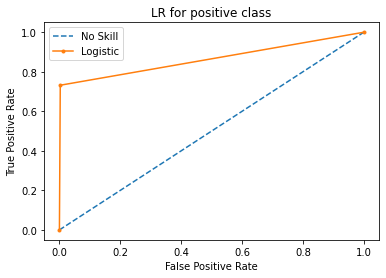

In [25]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LinearSVC model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,0].values
q[0:14]

0      neutral
1     positive
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10     neutral
11     neutral
12     neutral
13     neutral
14     neutral
15    positive
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Accuracy of the LinearSVC model is for negative class 0.975609756097561
No Skill: ROC AUC=0.500
LinearSVC: ROC AUC=0.788


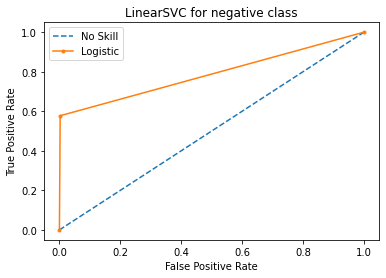

In [29]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LinearSVC model is for negative class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LinearSVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LinearSVC for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the MLP  negative model is 0.9754277393520204
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.856


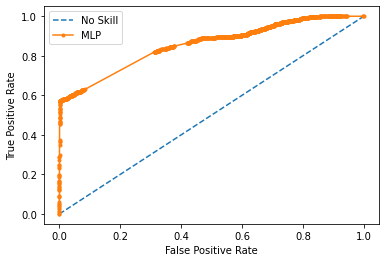

In [28]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = MLPClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the MLP  negative model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()